In [1]:
import pandas as pd
import numpy as np

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [3]:
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)

In [4]:
import warnings
warnings.filterwarnings('ignore')

### 코로나 사태 이후 (2020년 ~) 휴게음식점 업종별 폐업률 비교

###### 1) 데이터 파악

In [5]:
stores = pd.read_csv('data/휴게음식점.csv', encoding = 'cp949')
stores

,번호,개방서비스명,개방서비스아이디,개방자치단체코드,관리번호,인허가일자,인허가취소일자,영업상태구분코드,영업상태명,상세영업상태코드,상세영업상태명,폐업일자,휴업시작일자,휴업종료일자,재개업일자,소재지전화,소재지면적,소재지우편번호,소재지전체주소,도로명전체주소,도로명우편번호,사업장명,최종수정시점,데이터갱신구분,데이터갱신일자,업태구분명,좌표정보(x),좌표정보(y),위생업태명,남성종사자수,여성종사자수,영업장주변구분명,등급구분명,급수시설구분명,총직원수,본사직원수,공장사무직직원수,공장판매직직원수,공장생산직직원수,건물소유구분명,보증액,월세액,다중이용업소여부,시설총규모,전통업소지정번호,전통업소주된음식,홈페이지,Unnamed: 47
0,1,휴게음식점,07_24_05_P,4040000,4040000-104-2022-00116,2022-05-17,NaN,3,폐업,2,폐업,2022-07-04,NaN,NaN,NaN,NaN,284.24,465-150,경기도 하남시 망월동 976 파인빌딩,"경기도 하남시 미사강변대로226번안길 21, 파인빌딩 1층 101-108호 (망월동)",12909.0,(주)아이알엔디벨로퍼지 G9방위대,2022-07-04 14:21:21,U,2022-07-06 02:40:00,커피숍,216337.226029,451901.212893,커피숍,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,N,284.24,NaN,NaN,NaN,NaN
1,2,휴게음식점,07_24_05_P,3670000,3670000-104-2022-00149,2022-05-27,NaN,3,폐업,2,폐업,2022-06-09,NaN,NaN,NaN,NaN,NaN,305-500,대전광역시 유성구 용산동 579 현대프리미엄아울렛 대전점,"대전광역시 유성구 테크노중앙로 123, 현대프리미엄아울렛 대전점 지상3층 1호 (용산동)",34030.0,온누리농특산,2022-06-10 04:15:09,U,2022-06-12 02:40:00,일반조리판매,235682.718232,324850.017801,일반조리판매,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,N,0.00,NaN,NaN,NaN,NaN
2,3,휴게음식점,07_24_05_P,4670000,4670000-104-2022-00076,2022-05-23,NaN,3,폐업,2,폐업,2022-06-22,NaN,NaN,NaN,NaN,3.30,573-370,전라북도 군산시 수송동 821-5,전라북도 군산시 수송남로 36-1 (수송동),54101.0,이마트24R군산참조은점,2022-06-22 14:56:34,U,2022-06-25 02:40:00,편의점,174177.015998,273636.206727,편의점,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,N,3.30,NaN,NaN,NaN,NaN
3,4,휴게음식점,07_24_05_P,3150000,3150000-104-2022-00138,2022-05-19,NaN,3,폐업,2,폐업,2022-05-25,NaN,NaN,NaN,NaN,32.69,157-210,서울특별시 강서구 마곡동 760 마곡나루역보타닉푸르지오시티 지하1층 132호,"서울특별시 강서구 마곡중앙5로 6, 마곡나루역보타닉푸르지오시티 지하1층 132호 (...",7788.0,쿠잉 마곡나루점,2022-05-25 18:00:20,U,2022-05-27 02:40:00,커피숍,184646.580818,451684.726858,커피숍,0.0,0.0,NaN,NaN,상수도전용,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,N,32.69,NaN,NaN,NaN,NaN
4,5,휴게음식점,07_24_05_P,5530000,5530000-104-2022-00268,2022-05-17,NaN,3,폐업,2,폐업,2022-05-19,NaN,NaN,NaN,NaN,0.00,445-150,경기도 화성시 오산동 967-157 동탄역 롯데캐슬 판매시설 지1층 쇼핑몰 일부호,"경기도 화성시 동탄역로 160, 동탄역 롯데캐슬 판매시설 지1층 쇼핑몰 일부호 (오산동)",18478.0,제이와이에스유통,2022-05-20 04:15:09,U,2022-05-22 02:40:00,일반조리판매,208569.642432,410949.263462,일반조리판매,0.0,0.0,NaN,NaN,상수도전용,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,N,0.00,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521994,521995,휴게음식점,07_24_05_P,3610000,3610000-104-2018-00018,2018-03-14,NaN,1,영업/정상,1,영업,NaN,NaN,NaN,NaN,062 673 8482,3.30,503-060,광주광역시 남구 봉선동 1095 1층 201동 102호,"광주광역시 남구 제석로 104, 201동 1층 102호 (봉선동)",61702.0,GS25HR아팰리스점,2021-05-06 10:26:22,U,2021-05-08 02:40:00,편의점,191511.220911,180531.945951,편의점,1.0,NaN,기타,기타,상수도전용,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,3.30,NaN,NaN,NaN,NaN
521995,521996,휴게음식점,07_24_05_P,3610000,3610000-104-2018-00027,2018-04-10,NaN,1,영업/정상,1,영업,NaN,NaN,NaN,NaN,062 651 8001,56.10,503-809,광주광역시 남구 백운동 620-11번지 1층,"광주광역시 남구 독립로 30-3, 1층 (백운동)",61657.0,석류나무,2018-05-10 16:52:55,I,2018-08-31 23:59:59,일반조리판매,190987.643081,181915.397881,일반조리판매,1.0,1.0,기타,기타,상수도전용,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,56.10,NaN,NaN,NaN,NaN
521996,521997,휴게음식점,07_24_05_P,3610000,3610000-104-2018-00031,2018-04-19,NaN,1,영업/정상,1,영업,NaN,NaN,NaN,NaN,NaN,16.00,503-840,"광주광역시 남구 진월동 294-17번지 광동빌딩, 2층","광주광역시 남구 서문대로 700, 광동빌딩 2층 (진월동)",61709.0,블랑PC방,2018-05-02 15:55:49,I,2018-08-31 23:59:59,일반조리판매,190720.873936,180300.549186,일반조리판매,1.0,1.0,기타,기타,상수도전용,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,16.00,NaN,NaN,NaN,NaN
521997,521998,휴게음식점,07_24_05_P,3610000,3610000-104-2017-00085,2017-12-18,NaN,1,영업/정상,1,영업,NaN,NaN,NaN,NaN,NaN,12.00,503-829,광주광역시 남구 월산동 901-30번지 1층,"광주광역시 남구 월산로151번길 10, 땡큐pc방 1층 (월산동)",61619.0,엔젤pc,2017-12-21 15:28:56,I,2018-08-31 23:59:59,기타 휴게음식점,190337.038953,183555.773219,기타 휴게음식점,1.0,2.0,기타,기타,상수도전용,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,12.00,NaN,NaN,NaN,NaN


In [6]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 521999 entries, 0 to 521998
Data columns (total 48 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   번호           521999 non-null  int64  
 1   개방서비스명       521999 non-null  object 
 2   개방서비스아이디     521999 non-null  object 
 3   개방자치단체코드     521999 non-null  int64  
 4   관리번호         521999 non-null  object 
 5   인허가일자        521980 non-null  object 
 6   인허가취소일자      0 non-null       float64
 7   영업상태구분코드     521999 non-null  int64  
 8   영업상태명        521999 non-null  object 
 9   상세영업상태코드     521999 non-null  int64  
 10  상세영업상태명      521999 non-null  object 
 11  폐업일자         322820 non-null  object 
 12  휴업시작일자       0 non-null       float64
 13  휴업종료일자       0 non-null       float64
 14  재개업일자        0 non-null       float64
 15  소재지전화        242746 non-null  object 
 16  소재지면적        483835 non-null  float64
 17  소재지우편번호      503152 non-null  object 
 18  소재지전체주소      520154 non-

In [7]:
stores=stores[['사업장명','위생업태명','인허가일자','영업상태명','폐업일자']]
stores.head()

,사업장명,위생업태명,인허가일자,영업상태명,폐업일자
0,(주)아이알엔디벨로퍼지 G9방위대,커피숍,2022-05-17,폐업,2022-07-04
1,온누리농특산,일반조리판매,2022-05-27,폐업,2022-06-09
2,이마트24R군산참조은점,편의점,2022-05-23,폐업,2022-06-22
3,쿠잉 마곡나루점,커피숍,2022-05-19,폐업,2022-05-25
4,제이와이에스유통,일반조리판매,2022-05-17,폐업,2022-05-19


In [8]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 521999 entries, 0 to 521998
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   사업장명    521999 non-null  object
 1   위생업태명   521981 non-null  object
 2   인허가일자   521980 non-null  object
 3   영업상태명   521999 non-null  object
 4   폐업일자    322820 non-null  object
dtypes: object(5)
memory usage: 19.9+ MB


In [9]:
# columns : 사업장명 / 위생업태명 / 인허가일자 / 영업상태명 / 폐업일자 

In [10]:
# 폐업일자의 Dtype이 object형. 나중에 날짜 데이터로 변경 필요. 

In [11]:
#각 컬럼별 값 확인
stores.사업장명.value_counts()

정다방       505
별다방       489
수다방       481
약속다방      433
이삭토스트     406
         ... 
모네커피        1
북악파크호텔      1
꽃망울         1
카자로18호      1
엔젤pc        1
Name: 사업장명, Length: 357466, dtype: int64

###### 2) 결측치 확인 및 처리 

In [12]:
stores.위생업태명.isnull().sum()

18

In [13]:
#위생업태명 정보 없는 행은 삭제 
stores.dropna(subset='위생업태명', inplace = True)

In [14]:
stores.위생업태명.value_counts()

커피숍         152387
일반조리판매       83667
기타 휴게음식점     83252
다방           79337
편의점          48081
패스트푸드        30250
과자점          23436
백화점           5916
푸드트럭          5323
전통찻집          2609
아이스크림         2318
키즈카페          1242
고속도로          1226
떡카페            977
철도역구내          740
유원지            663
관광호텔           247
극장             194
공항              83
한식              11
분식               8
기타               4
김밥(도시락)          2
호프/통닭            2
룸살롱              1
식품소분업            1
까페               1
경양식              1
식육(숯불구이)         1
단란주점             1
Name: 위생업태명, dtype: int64

###### 3) 업종별 데이터 추출 

- 분석 항목
    - 업종별로 폐업된 사업장 수를 파악
    - 2020년 이후 폐업률을 계산하고 이를 시각화 
    - 2020년 이후 가장 많은 폐업률을 기록한 업종은 무엇인지 확인
    - 푸드트럭의 폐업률은 다른 업종과 비교해 상대적으로 높은 편인지 확인 

- 분석 순서 
    - 업종별로 사업장 개수 상위 10개 데이터만 포함.
    - 데이터 추출
    - index 정리 (재설정)
    - 영업상태명 확인 (폐업 or 영업/정상 수) 
    - 폐업 데이터만 추출
    - 폐업 일자 확인 
    - 2020년 이후 폐업 데이터 추출 
    - 폐업률 계산 

In [15]:
stores.위생업태명.value_counts() >= 500

커피숍          True
일반조리판매       True
기타 휴게음식점     True
다방           True
편의점          True
패스트푸드        True
과자점          True
백화점          True
푸드트럭         True
전통찻집         True
아이스크림        True
키즈카페         True
고속도로         True
떡카페          True
철도역구내        True
유원지          True
관광호텔        False
극장          False
공항          False
한식          False
분식          False
기타          False
김밥(도시락)     False
호프/통닭       False
룸살롱         False
식품소분업       False
까페          False
경양식         False
식육(숯불구이)    False
단란주점        False
Name: 위생업태명, dtype: bool

###### 3-1 ) 커피숍 데이터 

In [16]:
# 커피숍 데이터 추출 
st_cafe = stores[stores.위생업태명 == '커피숍']
st_cafe

,사업장명,위생업태명,인허가일자,영업상태명,폐업일자
0,(주)아이알엔디벨로퍼지 G9방위대,커피숍,2022-05-17,폐업,2022-07-04
3,쿠잉 마곡나루점,커피숍,2022-05-19,폐업,2022-05-25
10,시즌온,커피숍,2022-05-23,폐업,2022-11-04
13,빈스빈스커피 수원화성점(한시적),커피숍,2022-05-17,폐업,2022-05-20
16,카페보타닉,커피숍,2022-05-17,폐업,2022-07-06
...,...,...,...,...,...
521982,스타벅스동대구터미널점,커피숍,2011-08-11,영업/정상,NaN
521983,메가엠지씨커피 광주봉선유안공원점,커피숍,2008-08-14,영업/정상,NaN
521986,파운데이 염주점,커피숍,2010-05-28,영업/정상,NaN
521989,벌크커피봉선점,커피숍,2017-10-23,영업/정상,NaN


In [17]:
# st_cafe 데이터프레임 인덱스 재설정
st_cafe.reset_index(inplace=True, drop=True)
st_cafe

,사업장명,위생업태명,인허가일자,영업상태명,폐업일자
0,(주)아이알엔디벨로퍼지 G9방위대,커피숍,2022-05-17,폐업,2022-07-04
1,쿠잉 마곡나루점,커피숍,2022-05-19,폐업,2022-05-25
2,시즌온,커피숍,2022-05-23,폐업,2022-11-04
3,빈스빈스커피 수원화성점(한시적),커피숍,2022-05-17,폐업,2022-05-20
4,카페보타닉,커피숍,2022-05-17,폐업,2022-07-06
...,...,...,...,...,...
152382,스타벅스동대구터미널점,커피숍,2011-08-11,영업/정상,NaN
152383,메가엠지씨커피 광주봉선유안공원점,커피숍,2008-08-14,영업/정상,NaN
152384,파운데이 염주점,커피숍,2010-05-28,영업/정상,NaN
152385,벌크커피봉선점,커피숍,2017-10-23,영업/정상,NaN


In [18]:
# st_cafe의 폐업 여부 출력 

In [19]:
cafe_status = st_cafe.영업상태명.value_counts()
cafe_status

영업/정상    80379
폐업       72008
Name: 영업상태명, dtype: int64

In [20]:
# st_cafe에서 영업상태가 폐업인 데이터 추출 

In [21]:
cafe_close = stores[(stores.위생업태명 == '커피숍') & 
                  (stores.영업상태명 == '폐업')]

In [22]:
cafe_close

,사업장명,위생업태명,인허가일자,영업상태명,폐업일자
0,(주)아이알엔디벨로퍼지 G9방위대,커피숍,2022-05-17,폐업,2022-07-04
3,쿠잉 마곡나루점,커피숍,2022-05-19,폐업,2022-05-25
10,시즌온,커피숍,2022-05-23,폐업,2022-11-04
13,빈스빈스커피 수원화성점(한시적),커피숍,2022-05-17,폐업,2022-05-20
16,카페보타닉,커피숍,2022-05-17,폐업,2022-07-06
...,...,...,...,...,...
322795,카페아리네,커피숍,2018-06-05,폐업,2018-06-05
322813,토라네코,커피숍,2018-04-30,폐업,2019-03-25
322816,유달리,커피숍,2017-12-18,폐업,2019-12-16
322818,케냐에스프레소,커피숍,2009-07-24,폐업,2013-10-16


In [23]:
cafe_close.reset_index(inplace = True, drop = True)

In [24]:
cafe_close

,사업장명,위생업태명,인허가일자,영업상태명,폐업일자
0,(주)아이알엔디벨로퍼지 G9방위대,커피숍,2022-05-17,폐업,2022-07-04
1,쿠잉 마곡나루점,커피숍,2022-05-19,폐업,2022-05-25
2,시즌온,커피숍,2022-05-23,폐업,2022-11-04
3,빈스빈스커피 수원화성점(한시적),커피숍,2022-05-17,폐업,2022-05-20
4,카페보타닉,커피숍,2022-05-17,폐업,2022-07-06
...,...,...,...,...,...
72003,카페아리네,커피숍,2018-06-05,폐업,2018-06-05
72004,토라네코,커피숍,2018-04-30,폐업,2019-03-25
72005,유달리,커피숍,2017-12-18,폐업,2019-12-16
72006,케냐에스프레소,커피숍,2009-07-24,폐업,2013-10-16


In [25]:
cafe_close.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72008 entries, 0 to 72007
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   사업장명    72008 non-null  object
 1   위생업태명   72008 non-null  object
 2   인허가일자   72007 non-null  object
 3   영업상태명   72008 non-null  object
 4   폐업일자    72008 non-null  object
dtypes: object(5)
memory usage: 2.7+ MB


In [26]:
# cafe_close에서 2020년 이후 폐업한 데이터를 추출

In [27]:
# 폐업일자의 Dtype 변환 필요. 

In [28]:
# 폐업일자의 연/월/일 분리
cafe_dates = cafe_close.폐업일자.str.split('-')
cafe_dates

0        [2022, 07, 04]
1        [2022, 05, 25]
2        [2022, 11, 04]
3        [2022, 05, 20]
4        [2022, 07, 06]
              ...      
72003    [2018, 06, 05]
72004    [2019, 03, 25]
72005    [2019, 12, 16]
72006    [2013, 10, 16]
72007    [2013, 10, 16]
Name: 폐업일자, Length: 72008, dtype: object

In [29]:
cafe_dates.str.get(0)
cafe_dates.str.get(1)
cafe_dates.str.get(2)

0        2022
1        2022
2        2022
3        2022
4        2022
         ... 
72003    2018
72004    2019
72005    2019
72006    2013
72007    2013
Name: 폐업일자, Length: 72008, dtype: object

0        07
1        05
2        11
3        05
4        07
         ..
72003    06
72004    03
72005    12
72006    10
72007    10
Name: 폐업일자, Length: 72008, dtype: object

0        04
1        25
2        04
3        20
4        06
         ..
72003    05
72004    25
72005    16
72006    16
72007    16
Name: 폐업일자, Length: 72008, dtype: object

In [30]:
# 분리된 데이터를 데이터 프레임의 새로운 컬럼으로 추가 

In [31]:
cafe_close['year'] = cafe_dates.str.get(0)
cafe_close['month'] = cafe_dates.str.get(1)

In [32]:
cafe_close

,사업장명,위생업태명,인허가일자,영업상태명,폐업일자,year,month
0,(주)아이알엔디벨로퍼지 G9방위대,커피숍,2022-05-17,폐업,2022-07-04,2022,07
1,쿠잉 마곡나루점,커피숍,2022-05-19,폐업,2022-05-25,2022,05
2,시즌온,커피숍,2022-05-23,폐업,2022-11-04,2022,11
3,빈스빈스커피 수원화성점(한시적),커피숍,2022-05-17,폐업,2022-05-20,2022,05
4,카페보타닉,커피숍,2022-05-17,폐업,2022-07-06,2022,07
...,...,...,...,...,...,...,...
72003,카페아리네,커피숍,2018-06-05,폐업,2018-06-05,2018,06
72004,토라네코,커피숍,2018-04-30,폐업,2019-03-25,2019,03
72005,유달리,커피숍,2017-12-18,폐업,2019-12-16,2019,12
72006,케냐에스프레소,커피숍,2009-07-24,폐업,2013-10-16,2013,10


In [33]:
cafe_close.year=cafe_close.year.astype('int64')
cafe_close.month=cafe_close.month.astype('int64')

In [34]:
cafe_close.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72008 entries, 0 to 72007
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   사업장명    72008 non-null  object
 1   위생업태명   72008 non-null  object
 2   인허가일자   72007 non-null  object
 3   영업상태명   72008 non-null  object
 4   폐업일자    72008 non-null  object
 5   year    72008 non-null  int64 
 6   month   72008 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 3.8+ MB


In [35]:
# 폐업일자가 2020년 3월 이후인 값만 추출

In [36]:
cafe_real_close = (cafe_close.year >= 2020) & (cafe_close.month >= 1)
cafe_close = cafe_close[cafe_real_close]

In [64]:
cafe_close.reset_index(inplace = True, drop = True)
cafe_close

,사업장명,위생업태명,인허가일자,영업상태명,폐업일자,year,month
0,(주)아이알엔디벨로퍼지 G9방위대,커피숍,2022-05-17,폐업,2022-07-04,2022,7
1,쿠잉 마곡나루점,커피숍,2022-05-19,폐업,2022-05-25,2022,5
2,시즌온,커피숍,2022-05-23,폐업,2022-11-04,2022,11
3,빈스빈스커피 수원화성점(한시적),커피숍,2022-05-17,폐업,2022-05-20,2022,5
4,카페보타닉,커피숍,2022-05-17,폐업,2022-07-06,2022,7
...,...,...,...,...,...,...,...
27921,해밀가,커피숍,2011-11-21,폐업,2021-12-22,2021,12
27922,일루아커피,커피숍,2015-03-24,폐업,2021-04-29,2021,4
27923,커피앤베이글,커피숍,2014-12-29,폐업,2022-04-05,2022,4
27924,시월커피,커피숍,2017-10-25,폐업,2021-02-01,2021,2


27926

###### 3-2 ) 일반조리판매

In [38]:
st_jori = stores[stores.위생업태명 == '일반조리판매']
st_jori.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83667 entries, 1 to 521998
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   사업장명    83667 non-null  object
 1   위생업태명   83667 non-null  object
 2   인허가일자   83661 non-null  object
 3   영업상태명   83667 non-null  object
 4   폐업일자    58054 non-null  object
dtypes: object(5)
memory usage: 3.8+ MB


In [39]:
st_jori.reset_index(inplace=True, drop=True)
st_jori.영업상태명.value_counts()
jori_status = st_jori.영업상태명.value_counts()
jori_close = stores[(stores.위생업태명 == '일반조리판매') & 
                  (stores.영업상태명 == '폐업')]

폐업       58054
영업/정상    25613
Name: 영업상태명, dtype: int64

In [40]:
jori_dates = jori_close.폐업일자.str.split('-')
jori_close['year'] = jori_dates.str.get(0)
jori_close['month'] = jori_dates.str.get(1)

In [41]:
jori_close.year=jori_close.year.astype('int64')
jori_close.month=jori_close.month.astype('int64')

In [42]:
jori_real_close = (jori_close.year >= 2020) & (jori_close.month >= 1)
jori_close = jori_close[jori_real_close]
jori_close.reset_index(inplace = True, drop = True)

In [43]:
jori_close

,사업장명,위생업태명,인허가일자,영업상태명,폐업일자,year,month
0,온누리농특산,일반조리판매,2022-05-27,폐업,2022-06-09,2022,6
1,제이와이에스유통,일반조리판매,2022-05-17,폐업,2022-05-19,2022,5
2,갈모산방,일반조리판매,2022-05-19,폐업,2022-11-03,2022,11
3,세븐일레븐 경기드림타워점,일반조리판매,2022-05-19,폐업,2023-01-11,2023,1
4,요거트버니,일반조리판매,2022-05-23,폐업,2022-09-28,2022,9
...,...,...,...,...,...,...,...
12303,서울치즈피자,일반조리판매,2012-04-03,폐업,2021-12-24,2021,12
12304,심봉사도로케,일반조리판매,2018-01-12,폐업,2020-06-16,2020,6
12305,비에뜨반미봉선점,일반조리판매,2018-03-28,폐업,2020-07-13,2020,7
12306,자매떡볶이,일반조리판매,2017-09-18,폐업,2021-03-11,2021,3


###### 3-3 ) 기타 휴게 음식점

###### 3-4 ) 다방


In [44]:
st_db = stores[stores.위생업태명 == '다방']
st_db.info()
st_db.reset_index(inplace=True, drop=True)
st_db.영업상태명.value_counts()
db_status = st_db.영업상태명.value_counts()
db_close = stores[(stores.위생업태명 == '다방') & 
                  (stores.영업상태명 == '폐업')]
db_dates = db_close.폐업일자.str.split('-')
db_close['year'] = db_dates.str.get(0)
db_close['month'] = db_dates.str.get(1)
db_close.year=db_close.year.astype('int64')
db_close.month=db_close.month.astype('int64')
db_real_close = (db_close.year >= 2020) & (db_close.month >= 1)
db_close = db_close[db_real_close]
db_close.reset_index(inplace = True, drop = True)
db_close

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79337 entries, 25 to 521914
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   사업장명    79337 non-null  object
 1   위생업태명   79337 non-null  object
 2   인허가일자   79330 non-null  object
 3   영업상태명   79337 non-null  object
 4   폐업일자    70121 non-null  object
dtypes: object(5)
memory usage: 3.6+ MB


폐업       70121
영업/정상     9216
Name: 영업상태명, dtype: int64

,사업장명,위생업태명,인허가일자,영업상태명,폐업일자,year,month
0,애프터선셋(After Sunset),다방,2022-05-23,폐업,2022-12-30,2022,12
1,진다방,다방,2022-05-11,폐업,2022-10-12,2022,10
2,연다방,다방,2022-06-17,폐업,2022-07-12,2022,7
3,정다방,다방,2022-05-10,폐업,2022-05-27,2022,5
4,목화다방,다방,2022-05-30,폐업,2022-11-14,2022,11
...,...,...,...,...,...,...,...
3096,커피마시자,다방,2013-08-08,폐업,2021-12-21,2021,12
3097,영,다방,2005-01-18,폐업,2022-02-14,2022,2
3098,파티마 커피숍,다방,2014-11-05,폐업,2020-10-07,2020,10
3099,예전다방,다방,2002-08-08,폐업,2020-05-25,2020,5


###### 3-5 ) 편의점


In [45]:
st_cu = stores[stores.위생업태명 == '편의점']
st_cu.info()
st_cu.reset_index(inplace=True, drop=True)
st_cu.영업상태명.value_counts()
cu_status = st_cu.영업상태명.value_counts()
cu_close = stores[(stores.위생업태명 == '편의점') & 
                  (stores.영업상태명 == '폐업')]
cu_dates = cu_close.폐업일자.str.split('-')
cu_close['year'] = cu_dates.str.get(0)
cu_close['month'] = cu_dates.str.get(1)
cu_close.year=cu_close.year.astype('int64')
cu_close.month=cu_close.month.astype('int64')
cu_real_close = (cu_close.year >= 2020) & (cu_close.month >= 1)
cu_close = cu_close[cu_real_close]
cu_close.reset_index(inplace = True, drop = True)
cu_close

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48081 entries, 2 to 521994
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   사업장명    48081 non-null  object
 1   위생업태명   48081 non-null  object
 2   인허가일자   48081 non-null  object
 3   영업상태명   48081 non-null  object
 4   폐업일자    15513 non-null  object
dtypes: object(5)
memory usage: 2.2+ MB


영업/정상    32568
폐업       15513
Name: 영업상태명, dtype: int64

,사업장명,위생업태명,인허가일자,영업상태명,폐업일자,year,month
0,이마트24R군산참조은점,편의점,2022-05-23,폐업,2022-06-22,2022,6
1,세븐일레븐 한양스퀘어점,편의점,2022-05-17,폐업,2023-01-20,2023,1
2,전라남도지체장애인협회,편의점,2022-04-28,폐업,2022-05-09,2022,5
3,농촌에서 살아보기 프로젝트형,편의점,2022-04-28,폐업,2022-05-09,2022,5
4,세븐일레븐 대구봉덕점,편의점,2022-05-27,폐업,2022-06-23,2022,6
...,...,...,...,...,...,...,...
6463,GS25동촌중앙점,편의점,2011-11-25,폐업,2020-10-07,2020,10
6464,지에스(GS)25불로점,편의점,2018-02-07,폐업,2021-08-20,2021,8
6465,세븐일레븐 대구엘크루점,편의점,2017-05-29,폐업,2022-01-13,2022,1
6466,미니스톱 대구신암점,편의점,2017-04-20,폐업,2020-09-14,2020,9


###### 3-6 ) 패스트푸드

In [46]:
st_ff = stores[stores.위생업태명 == '패스트푸드']
st_ff.info()
st_ff.reset_index(inplace=True, drop=True)
st_ff.영업상태명.value_counts()
ff_status = st_ff.영업상태명.value_counts()
ff_close = stores[(stores.위생업태명 == '패스트푸드') & 
                  (stores.영업상태명 == '폐업')]
ff_close.dropna(subset='폐업일자', inplace = True)
ff_dates = ff_close.폐업일자.str.split('-')
ff_close['year'] = ff_dates.str.get(0)
ff_close['month'] = ff_dates.str.get(1)
ff_close.year=ff_close.year.astype('int64')
ff_close.month=ff_close.month.astype('int64')
ff_real_close = (ff_close.year >= 2020) & (ff_close.month >= 1)
ff_close = ff_close[ff_real_close]
ff_close.reset_index(inplace = True, drop = True)
ff_close

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30250 entries, 109 to 521988
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   사업장명    30250 non-null  object
 1   위생업태명   30250 non-null  object
 2   인허가일자   30250 non-null  object
 3   영업상태명   30250 non-null  object
 4   폐업일자    20946 non-null  object
dtypes: object(5)
memory usage: 1.4+ MB


폐업       20947
영업/정상     9303
Name: 영업상태명, dtype: int64

,사업장명,위생업태명,인허가일자,영업상태명,폐업일자,year,month
0,세븐일레븐범어팰리스점,패스트푸드,2022-05-09,폐업,2022-11-09,2022,11
1,이츠버거,패스트푸드,2022-06-17,폐업,2022-06-20,2022,6
2,와인웍스(한시적),패스트푸드,2022-05-09,폐업,2022-05-15,2022,5
3,토스트와커피 고한점,패스트푸드,2022-05-06,폐업,2022-12-12,2022,12
4,곡성바게트버거,패스트푸드,2022-06-24,폐업,2022-07-17,2022,7
...,...,...,...,...,...,...,...
2748,토스트앤후르츠,패스트푸드,2012-03-26,폐업,2020-09-25,2020,9
2749,엠지리테일(주),패스트푸드,2014-04-17,폐업,2020-04-23,2020,4
2750,파마스리,패스트푸드,2014-03-28,폐업,2021-06-21,2021,6
2751,안강피자,패스트푸드,2012-11-02,폐업,2021-01-20,2021,1


###### 3-7 ) 과자점

In [52]:
st_snack = stores[stores.위생업태명 == '과자점']
st_snack.info()
st_snack.reset_index(inplace=True, drop=True)
st_snack.영업상태명.value_counts()
snack_status = st_snack.영업상태명.value_counts()
snack_close = stores[(stores.위생업태명 == '과자점') & 
                  (stores.영업상태명 == '폐업')]
snack_close.dropna(subset='폐업일자', inplace = True)
snack_dates = snack_close.폐업일자.str.split('-')
snack_close['year'] = snack_dates.str.get(0)
snack_close['month'] = snack_dates.str.get(1)
snack_close.year= snack_close.year.astype('int64')
snack_close.month= snack_close.month.astype('int64')
snack_real_close = (snack_close.year >= 2020) & (snack_close.month >= 1)
snack_close = snack_close[snack_real_close]
snack_close.reset_index(inplace = True, drop = True)
snack_close

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23436 entries, 4817 to 521913
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   사업장명    23436 non-null  object
 1   위생업태명   23436 non-null  object
 2   인허가일자   23431 non-null  object
 3   영업상태명   23436 non-null  object
 4   폐업일자    22708 non-null  object
dtypes: object(5)
memory usage: 1.1+ MB


폐업       22708
영업/정상      728
Name: 영업상태명, dtype: int64

,사업장명,위생업태명,인허가일자,영업상태명,폐업일자,year,month
0,드보브에갈레코리아,과자점,2003-11-04,폐업,2022-12-16,2022,12
1,스위트아일랜드,과자점,1994-11-26,폐업,2021-05-10,2021,5
2,제니키친,과자점,2014-12-17,폐업,2022-01-14,2022,1
3,춤추는 만두랑,과자점,2014-11-26,폐업,2020-10-19,2020,10
4,던킨도너츠,과자점,2007-06-21,폐업,2022-11-04,2022,11
...,...,...,...,...,...,...,...
251,주니파이,과자점,2010-12-16,폐업,2020-04-29,2020,4
252,(주)떡보의하루,과자점,2010-04-27,폐업,2022-02-08,2022,2
253,매점휴게실,과자점,2009-10-09,폐업,2023-01-19,2023,1
254,비어드파파롯데백화점대구상인점,과자점,2013-08-23,폐업,2020-12-31,2020,12


###### 3-8 ) 백화점

In [53]:
st_back = stores[stores.위생업태명 == '백화점']
st_back.info()
st_back.reset_index(inplace=True, drop=True)
st_back.영업상태명.value_counts()
back_status = st_back.영업상태명.value_counts()
back_close = stores[(stores.위생업태명 == '백화점') & 
                  (stores.영업상태명 == '폐업')]
back_close.dropna(subset='폐업일자', inplace = True)
back_dates = back_close.폐업일자.str.split('-')
back_close['year'] = back_dates.str.get(0)
back_close['month'] = back_dates.str.get(1)
back_close.year= back_close.year.astype('int64')
back_close.month= back_close.month.astype('int64')
back_real_close = (back_close.year >= 2020) & (back_close.month >= 1)
back_close = back_close[back_real_close]
back_close.reset_index(inplace = True, drop = True)
back_close

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5916 entries, 51 to 521545
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   사업장명    5916 non-null   object
 1   위생업태명   5916 non-null   object
 2   인허가일자   5916 non-null   object
 3   영업상태명   5916 non-null   object
 4   폐업일자    4922 non-null   object
dtypes: object(5)
memory usage: 277.3+ KB


폐업       4922
영업/정상     994
Name: 영업상태명, dtype: int64

,사업장명,위생업태명,인허가일자,영업상태명,폐업일자,year,month
0,오사카오지상 치즈케이크,백화점,2022-04-28,폐업,2022-05-31,2022,5
1,유니콘플랜드베이크 한시적영업,백화점,2022-05-09,폐업,2022-05-19,2022,5
2,주식회사 신이안루,백화점,2022-05-09,폐업,2022-05-26,2022,5
3,나무그늘(한시적),백화점,2022-06-21,폐업,2022-06-30,2022,6
4,주식회사제이와이에스유통,백화점,2022-05-09,폐업,2022-05-26,2022,5
...,...,...,...,...,...,...,...
1321,비어드파파롯데대전점,백화점,2005-03-30,폐업,2022-11-07,2022,11
1322,다우랑,백화점,2004-11-06,폐업,2021-01-15,2021,1
1323,풍족만족 서대전점,백화점,2017-03-23,폐업,2022-02-11,2022,2
1324,마루,백화점,2013-04-18,폐업,2020-09-10,2020,9


###### 3-9 ) 푸드트럭

In [54]:
st_truck = stores[stores.위생업태명 == '푸드트럭']
st_truck.info()
st_truck.reset_index(inplace=True, drop=True)
st_truck.영업상태명.value_counts()
truck_status = st_truck.영업상태명.value_counts()
truck_close = stores[(stores.위생업태명 == '푸드트럭') & 
                  (stores.영업상태명 == '폐업')]
truck_close.dropna(subset='폐업일자', inplace = True)
truck_dates = truck_close.폐업일자.str.split('-')
truck_close['year'] = truck_dates.str.get(0)
truck_close['month'] = truck_dates.str.get(1)
truck_close.year= truck_close.year.astype('int64')
truck_close.month= truck_close.month.astype('int64')
truck_real_close = (truck_close.year >= 2020) & (truck_close.month >= 1)
truck_close = truck_close[truck_real_close]
truck_close.reset_index(inplace = True, drop = True)
truck_close

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5323 entries, 5 to 521975
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   사업장명    5323 non-null   object
 1   위생업태명   5323 non-null   object
 2   인허가일자   5323 non-null   object
 3   영업상태명   5323 non-null   object
 4   폐업일자    3287 non-null   object
dtypes: object(5)
memory usage: 249.5+ KB


폐업       3287
영업/정상    2036
Name: 영업상태명, dtype: int64

,사업장명,위생업태명,인허가일자,영업상태명,폐업일자,year,month
0,엔제리너스 곡성특설,푸드트럭,2022-05-17,폐업,2022-06-06,2022,6
1,꼬치천국,푸드트럭,2022-04-28,폐업,2022-05-29,2022,5
2,완도 또바기,푸드트럭,2022-04-28,폐업,2022-05-08,2022,5
3,소울굿트럭(Soulgoodtruck),푸드트럭,2022-05-17,폐업,2022-05-20,2022,5
4,젤라또랜드,푸드트럭,2022-05-19,폐업,2022-06-28,2022,6
...,...,...,...,...,...,...,...
1085,핫츄,푸드트럭,2017-05-29,폐업,2022-01-07,2022,1
1086,어바웃커피,푸드트럭,2016-05-10,폐업,2020-12-16,2020,12
1087,길또랑,푸드트럭,2017-04-26,폐업,2022-02-03,2022,2
1088,밤차 (밤에돌아다니는야식차),푸드트럭,2017-04-26,폐업,2022-05-30,2022,5


###### 3-10 ) 전통찻집

In [55]:
st_tea = stores[stores.위생업태명 == '전통찻집']
st_tea.info()
st_tea.reset_index(inplace=True, drop=True)
st_tea.영업상태명.value_counts()
tea_status = st_tea.영업상태명.value_counts()
tea_close = stores[(stores.위생업태명 == '전통찻집') & 
                  (stores.영업상태명 == '폐업')]
tea_close.dropna(subset='폐업일자', inplace = True)
tea_dates = tea_close.폐업일자.str.split('-')
tea_close['year'] = tea_dates.str.get(0)
tea_close['month'] = tea_dates.str.get(1)
tea_close.year= tea_close.year.astype('int64')
tea_close.month= tea_close.month.astype('int64')
tea_real_close = (tea_close.year >= 2020) & (tea_close.month >= 1)
tea_close = tea_close[tea_real_close]
tea_close.reset_index(inplace = True, drop = True)
tea_close

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2609 entries, 244 to 521917
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   사업장명    2609 non-null   object
 1   위생업태명   2609 non-null   object
 2   인허가일자   2609 non-null   object
 3   영업상태명   2609 non-null   object
 4   폐업일자    1658 non-null   object
dtypes: object(5)
memory usage: 122.3+ KB


폐업       1658
영업/정상     951
Name: 영업상태명, dtype: int64

,사업장명,위생업태명,인허가일자,영업상태명,폐업일자,year,month
0,금은화,전통찻집,2022-06-03,폐업,2022-11-09,2022,11
1,하늘호수,전통찻집,2022-05-20,폐업,2022-06-02,2022,6
2,오아세 티하우스,전통찻집,2022-06-09,폐업,2022-08-23,2022,8
3,청수옥,전통찻집,2021-01-29,폐업,2021-02-17,2021,2
4,사주와 차,전통찻집,2020-11-24,폐업,2021-10-19,2021,10
...,...,...,...,...,...,...,...
323,조말순,전통찻집,2015-12-02,폐업,2020-11-02,2020,11
324,포랑산전통찻집,전통찻집,2015-11-24,폐업,2021-07-16,2021,7
325,차휴,전통찻집,2011-09-14,폐업,2021-01-04,2021,1
326,차마고도,전통찻집,2014-08-20,폐업,2022-12-28,2022,12


In [ ]:
# 업종별 폐업률 구하기 
# (2020년 이후 폐업한 사업장 수 / 총 사업장 수)

18.325710198376502

In [73]:
# 업종별 2020년 이후 폐업률 파악하기 위한 데이터 프레임 생성
# 업종별 2020년 이후 폐업률 계산한 뒤 시각화 
index = ['커피숍', '일반조리판매', '다방', '편의점', '패스트푸드', '과자점', '백화점', '푸드트럭', '전통찻집']
data = {'총_사업장_수' : [len(st_cafe.영업상태명), len(st_jori.영업상태명), len(st_db.영업상태명), 
                         len(st_cu.영업상태명), len(st_ff.영업상태명), len(st_snack.영업상태명),
                        len(st_back.영업상태명), len(st_truck.영업상태명), len(st_tea.영업상태명)], 
           '폐업_사업장_수' : [len(cafe_close), len(jori_close), len(db_close), len(cu_close),
                         len(ff_close), len(snack_close), len(back_close), len(truck_close), len(tea_close)]}


total_store = pd.DataFrame(data = data, index = index)
total_store

,총_사업장_수,폐업_사업장_수
커피숍,152387,27926
일반조리판매,83667,12308
다방,79337,3101
편의점,48081,6468
패스트푸드,30250,2753
과자점,23436,256
백화점,5916,1326
푸드트럭,5323,1090
전통찻집,2609,328


In [75]:
#폐업률 : (len(cafe_close) / len(st_cafe.영업상태명)) * 100
total_store['폐업률'] = (total_store.폐업_사업장_수) / (total_store.총_사업장_수) * 100
total_store

,총_사업장_수,폐업_사업장_수,폐업률
커피숍,152387,27926,18.325710
일반조리판매,83667,12308,14.710698
다방,79337,3101,3.908643
편의점,48081,6468,13.452299
패스트푸드,30250,2753,9.100826
과자점,23436,256,1.092337
백화점,5916,1326,22.413793
푸드트럭,5323,1090,20.477175
전통찻집,2609,328,12.571867


In [ ]:
# 시각화

In [84]:
import matplotlib.pyplot as plt
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

<AxesSubplot:>

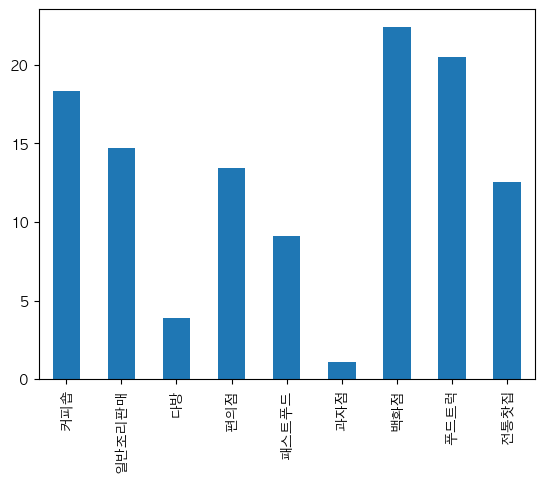

In [92]:
close = total_store.폐업률
close.index = ['커피숍', '일반조리판매', '다방', '편의점', '패스트푸드', '과자점',
              '백화점', '푸드트럭', '전통찻집']
close.plot.bar()

<AxesSubplot:ylabel='폐업률'>

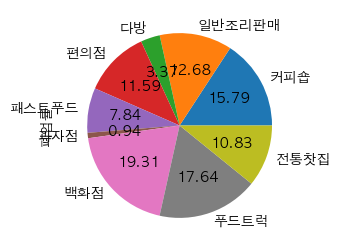

In [90]:
close.plot.pie(figsize = (3,3), autopct='%.2f', fontsize=10)